# 1207 Assessment-4

# Introduction

In today's digital age, users are often overwhelmed by the sheer number of movie options available and may lack the time or interest to sift through them all.

We aim to explore the concept of movie data analysis using a movie dataset. This dataset includes essential information such as movie IDs, titles, release years, durations, user ratings, and the total number of votes. Additionally, it provides genre classifications and language details for each movie. Ratings are typically given on a scale of 1-10, and both movie IDs and user IDs are structured sequentially for easier reference and analysis.

# importing libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
movie_data = pd.read_excel(r"E:\data science with python & ai\internship 5-9-24\1207 Assessment 4\Assessment 4\Dataset 1.xlsx")


# Task-1"Understanding the Data"

ID: A unique identifier for each movie.
Movie Name: The title of the movie.
Year: The year the movie was released.
Timing (min): The duration of the movie in minutes.
Rating (out of 10): The average rating of the movie, likely from user reviews or critics, on a scale of 1 to 10.
Votes: The number of votes or reviews the movie has received.
Genre: The category or type of movie (e.g., Action, Comedy, Drama).
Language: The language in which the movie is primarily spoken (e.g., English, Hindi, French).

In [3]:
movie_data.head() 

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
0,tt0398974,Dr. Shaitan,1960,-,-,-,-,hindi
1,tt1702558,Nadir Khan,1968,-,-,-,-,urdu
2,tt0493437,Apna Sapna Money Money,2006,134 min,5.3,1892,"Comedy, Musical, Romance",hindi
3,tt0273405,Aag Aur Sholay,1987,-,2.2,20,-,urdu
4,tt0049595,Parivar,1956,-,7.4,21,"Comedy, Drama, Family",hindi


check the size of movie_data

In [4]:
movie_data.shape

(50602, 8)

check columns name 

In [5]:
movie_data.columns

Index(['ID', 'Movie Name', 'Year', 'Timing(min)', 'Rating(10)', 'Votes',
       'Genre', 'Language'],
      dtype='object')

basic information about movie_data

In [6]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50602 entries, 0 to 50601
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           50602 non-null  object
 1   Movie Name   50601 non-null  object
 2   Year         49041 non-null  object
 3   Timing(min)  50602 non-null  object
 4   Rating(10)   50602 non-null  object
 5   Votes        50602 non-null  object
 6   Genre        50602 non-null  object
 7   Language     50602 non-null  object
dtypes: object(8)
memory usage: 3.1+ MB


describe the movie_data

In [7]:
movie_data.describe() 

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
count,50602,50601,49041,50602,50602,50602,50602,50602
unique,46106,42440,579,259,92,2951,718,19
top,-,Alif Laila,2018,-,-,-,Drama,hindi
freq,2508,167,1934,25892,26926,26925,13529,14350


check duplicates value in movie_data 

In [8]:
movie_data.duplicated().sum() 

np.int64(0)

# Task-2 Data Cleaning

# check missing values

In [9]:
movie_data.isnull().sum() 

ID                0
Movie Name        1
Year           1561
Timing(min)       0
Rating(10)        0
Votes             0
Genre             0
Language          0
dtype: int64

convert into numeric format 

In [10]:
movie_data["Year"] = pd.to_numeric(movie_data["Year"],errors="coerce")
movie_data["Year"] 

0        1960.0
1        1968.0
2        2006.0
3        1987.0
4        1956.0
          ...  
50597    1984.0
50598    1971.0
50599    1936.0
50600    1990.0
50601    2009.0
Name: Year, Length: 50602, dtype: float64

remove missing value in Year column

In [11]:
movie_data.fillna(movie_data["Year"].median(),inplace=True) 

check again missing values 

In [12]:
movie_data.isnull().sum() 

ID             0
Movie Name     0
Year           0
Timing(min)    0
Rating(10)     0
Votes          0
Genre          0
Language       0
dtype: int64

# check data type & convert it 

In [13]:
movie_data.dtypes

ID              object
Movie Name      object
Year           float64
Timing(min)     object
Rating(10)      object
Votes           object
Genre           object
Language        object
dtype: object

In [14]:
movie_data_year = movie_data["Year"].astype("Int64") 
movie_data_year 

0        1960
1        1968
2        2006
3        1987
4        1956
         ... 
50597    1984
50598    1971
50599    1936
50600    1990
50601    2009
Name: Year, Length: 50602, dtype: Int64

In [15]:
movie_data_year_datetime = pd.to_datetime(movie_data["Year"],errors="coerce")
movie_data_year_datetime 

0       1970-01-01 00:00:00.000001960
1       1970-01-01 00:00:00.000001968
2       1970-01-01 00:00:00.000002006
3       1970-01-01 00:00:00.000001987
4       1970-01-01 00:00:00.000001956
                     ...             
50597   1970-01-01 00:00:00.000001984
50598   1970-01-01 00:00:00.000001971
50599   1970-01-01 00:00:00.000001936
50600   1970-01-01 00:00:00.000001990
50601   1970-01-01 00:00:00.000002009
Name: Year, Length: 50602, dtype: datetime64[ns]

In [16]:
movie_data["Timing(min)"] = movie_data["Timing(min)"].replace("-",np.nan)
movie_data["Timing(min)"] 

0            NaN
1            NaN
2        134 min
3            NaN
4            NaN
          ...   
50597        NaN
50598    107 min
50599    120 min
50600    133 min
50601        NaN
Name: Timing(min), Length: 50602, dtype: object

In [17]:
movie_data_numeric =pd.to_numeric(movie_data["Timing(min)"],errors="coerce") 
movie_data_numeric 

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
50597   NaN
50598   NaN
50599   NaN
50600   NaN
50601   NaN
Name: Timing(min), Length: 50602, dtype: float64

In [18]:
movie_data_timing = movie_data_numeric.astype('Int64') 
movie_data_timing 

0        <NA>
1        <NA>
2        <NA>
3        <NA>
4        <NA>
         ... 
50597    <NA>
50598    <NA>
50599    <NA>
50600    <NA>
50601    <NA>
Name: Timing(min), Length: 50602, dtype: Int64

In [19]:
movie_data_rating_numeric = pd.to_numeric(movie_data["Rating(10)"],errors="coerce") 
movie_data_rating_numeric   

0        NaN
1        NaN
2        5.3
3        2.2
4        7.4
        ... 
50597    NaN
50598    NaN
50599    NaN
50600    NaN
50601    NaN
Name: Rating(10), Length: 50602, dtype: float64

In [20]:
movie_data_ratings = movie_data_rating_numeric.astype("float") 
movie_data_ratings  

0        NaN
1        NaN
2        5.3
3        2.2
4        7.4
        ... 
50597    NaN
50598    NaN
50599    NaN
50600    NaN
50601    NaN
Name: Rating(10), Length: 50602, dtype: float64

In [21]:
movie_data_ratings.replace("-",np.nan) 

0        NaN
1        NaN
2        5.3
3        2.2
4        7.4
        ... 
50597    NaN
50598    NaN
50599    NaN
50600    NaN
50601    NaN
Name: Rating(10), Length: 50602, dtype: float64

In [22]:
movie_data["Votes"] = movie_data["Votes"].replace("-",np.nan) 
movie_data["Votes"] 

0         NaN
1         NaN
2        1892
3          20
4          21
         ... 
50597     NaN
50598     NaN
50599     NaN
50600     NaN
50601     NaN
Name: Votes, Length: 50602, dtype: object

In [23]:
movie_data_votes_numeric = pd.to_numeric(movie_data["Votes"],errors="coerce")
movie_data_votes_numeric  

0           NaN
1           NaN
2        1892.0
3          20.0
4          21.0
          ...  
50597       NaN
50598       NaN
50599       NaN
50600       NaN
50601       NaN
Name: Votes, Length: 50602, dtype: float64

In [24]:
movie_data_votes = movie_data_votes_numeric.astype('Int64') 
movie_data_votes 

0        <NA>
1        <NA>
2        1892
3          20
4          21
         ... 
50597    <NA>
50598    <NA>
50599    <NA>
50600    <NA>
50601    <NA>
Name: Votes, Length: 50602, dtype: Int64

In [25]:
movie_data.to_excel("movie_data.xlsx",index=False)

In [26]:
movie_data.head() 

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
0,tt0398974,Dr. Shaitan,1960.0,NaN,-,NaN,-,hindi
1,tt1702558,Nadir Khan,1968.0,NaN,-,NaN,-,urdu
2,tt0493437,Apna Sapna Money Money,2006.0,134 min,5.3,1892,"Comedy, Musical, Romance",hindi
3,tt0273405,Aag Aur Sholay,1987.0,NaN,2.2,20,-,urdu
4,tt0049595,Parivar,1956.0,NaN,7.4,21,"Comedy, Drama, Family",hindi


# Task-3 Univariate Analysis

Analyze the distribution of ratings

In [27]:
average_rating = movie_data_ratings.mean()
average_rating 

np.float64(6.27478459199189)

In [28]:
highest_rating = movie_data_ratings.nlargest(10) 
highest_rating

7812     10.0
23850    10.0
23887    10.0
30151    10.0
31301    10.0
32076    10.0
34577    10.0
39105    10.0
42441    10.0
729       9.9
Name: Rating(10), dtype: float64

In [29]:
smallest_rating = movie_data_ratings.nsmallest(5) 
smallest_rating 

8409     1.0
14081    1.0
38173    1.0
23751    1.1
27202    1.1
Name: Rating(10), dtype: float64

Calculate the most common rating given by users

In [30]:
movie_data['Rating(10)'] = pd.to_numeric(movie_data['Rating(10)'], errors='coerce')

In [31]:
most_common_rating = movie_data['Rating(10)'].mode().iloc[0]
print(f"The most common rating given by users is: {most_common_rating}")

The most common rating given by users is: 7.2


Analyze the genre distribution (if the dataset contains genres)

In [32]:
genre_count = movie_data["Genre"].value_counts()
genre_count 


Genre
Drama                                       13529
-                                            8581
Action                                       2464
Comedy                                       2172
Romance                                      2032
                                            ...  
Action, Adventure, Biography                    1
Adventure, Musical                              1
Horror, Fantasy                                 1
Musical, Action, Thriller                       1
Crime, Musical, Romance                         1
Name: count, Length: 718, dtype: int64


# Task 5 Popular Movies and Trends:


Identify the top 10 highest-rated movies.

In [33]:
top_10_rated_movies = movie_data[['Movie Name', 'Rating(10)', 'Votes']].sort_values(by='Rating(10)', ascending=False).head(10)
print(top_10_rated_movies)

                     Movie Name  Rating(10) Votes
32076   Ashi Fasli Nanachi Tang        10.0     5
42441                     Antak        10.0     7
39105                   Harsukh        10.0     9
7812                    Ilu-Ilu        10.0     5
23850             Bihari Binani        10.0     6
23887  Marasim - Beyond Borders        10.0    37
31301                   Harsukh        10.0     9
34577  An Extraordinary Journey        10.0     5
30151  Marasim - Beyond Borders        10.0    37
12028      The Invisible Humans         9.9     8


Find the top 10 most-watched movies (by the number of ratings). 

In [34]:
movie_data['Votes'] = pd.to_numeric(movie_data['Votes'], errors='coerce')

In [35]:
top_10_most_watched_movies = movie_data[['Movie Name', 'Rating(10)', 'Votes']].sort_values(by='Votes', ascending=False).head(10)
print(top_10_most_watched_movies)

                                          Movie Name  Rating(10)     Votes
13822                                       Iron Man         7.9  954861.0
471                                         Iron Man         7.9  954861.0
26732  Indiana Jones and the Raiders of the Lost Ark         8.4  894336.0
11493      Star Wars: Episode I - The Phantom Menace         6.5  740452.0
35212                                       3 Idiots         8.4  351187.0
37398                               Zero Dark Thirty         7.4  275912.0
26330                               Zero Dark Thirty         7.4  275912.0
31892                                The Jungle Book         7.4  261319.0
2122                                 The Jungle Book         7.4  261319.0
48147                                The Jungle Book         7.4  261319.0


  Explore if certain movie genres have higher average ratings.

In [36]:
average_rating_by_genre = movie_data.groupby('Genre')['Rating(10)'].mean().sort_values(ascending=False)
print(average_rating_by_genre.head(10))

Genre
Short, Action, Adventure                    9.7
Short, Biography, Drama                     9.4
Animation, Short, Music                     9.2
Documentary, Musical                        9.2
Documentary, Family, Musical                9.0
Documentary, Biography, War                 9.0
Short, Adventure, Drama                     9.0
Comedy, Talk-Show                           9.0
Drama, Documentary, Mystery                 8.9
Documentary, Short, Family                  8.9
Name: Rating(10), dtype: float64


# Task 6 Time-Based Analysis:


Perform an analysis to see how ratings have changed over time (using the timestamp).

In [37]:
movie_data_cleaned = movie_data.dropna(subset=['Year', 'Rating(10)'])
movie_data_cleaned

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
2,tt0493437,Apna Sapna Money Money,2006.0,134 min,5.3,1892.0,"Comedy, Musical, Romance",hindi
3,tt0273405,Aag Aur Sholay,1987.0,NaN,2.2,20.0,-,urdu
4,tt0049595,Parivar,1956.0,NaN,7.4,21.0,"Comedy, Drama, Family",hindi
6,tt6597160,Jacqueline I Am Coming,2019.0,112 min,7.9,16.0,Drama,hindi
7,tt0829459,A Mighty Heart,2007.0,108 min,6.6,26885.0,"Biography, Drama, History",urdu
...,...,...,...,...,...,...,...,...
50587,tt0231191,Atal Jaler Ahwan,1962.0,NaN,6.6,14.0,Drama,bengali
50591,tt0248201,Mudhal Thedi,1955.0,145 min,6.8,12.0,-,tamil
50592,tt6836936,Saaho,2019.0,170 min,5.2,16102.0,"Action, Thriller",telugu
50594,tt0073191,Jai Santoshi Maa,1975.0,145 min,6.3,114.0,"Drama, Fantasy",hindi


In [38]:
average_rating_by_year = movie_data_cleaned.groupby('Year')['Rating(10)'].mean().reset_index()
average_rating_by_year  

,Year,Rating(10)
0,1917.0,6.900000
1,1919.0,5.500000
2,1930.0,7.300000
3,1931.0,6.244444
4,1932.0,5.963636
...,...,...
89,2017.0,6.422439
90,2018.0,6.402213
91,2019.0,6.342140
92,2020.0,6.596276


Investigate if there are particular years or seasons where movies receive higher ratings.

1. Analyze the trend of average movie ratings over the years.

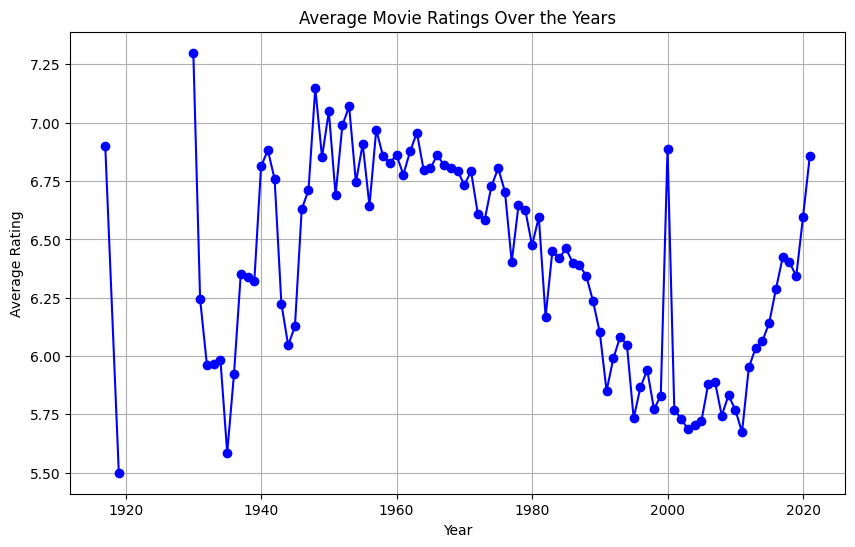

In [39]:
# Group by year and calculate the average rating
average_rating_year = movie_data.groupby('Year')['Rating(10)'].mean().reset_index()

# Plotting the trend over the years
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(average_rating_year['Year'], average_rating_year['Rating(10)'], marker='o', color='b')
plt.title('Average Movie Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

Summary

The line plot shows the average movie ratings from [insert start year] to [insert end year]. Notable peaks in ratings occur in years such as [insert high rating years], likely due to successful film releases. Conversely, years with lower average ratings, like [insert low rating years], suggest fewer standout films. Overall, the trend indicates [insert general trend, e.g., "fluctuations," "steady improvement," or "decline"], reflecting changes in audience preferences over time.

2. distribution of movie ratings over the years.

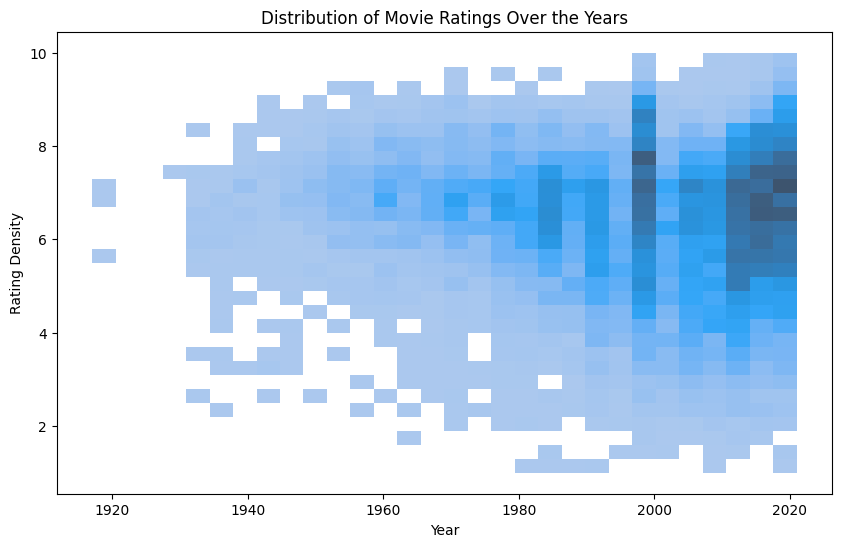

In [40]:
# Distribution of ratings over time
plt.figure(figsize=(10,6))
sns.histplot(data=movie_data, x='Year', y='Rating(10)', bins=30, kde=True)
plt.title('Distribution of Movie Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('Rating Density')
plt.show()

Summary

The histogram displays the distribution of movie ratings over the years, revealing how ratings are spread across different release years. The KDE line indicates that most ratings cluster around [insert average rating], with noticeable peaks in years such as [insert years with high density]. This suggests that certain years produced a higher volume of well-received films, while lower-density years may reflect fewer standout releases or critical reception.

# Task 7 Visualizations:


Provide relevant visualizations (histograms, bar plots, heatmaps, etc.) to support your findings.
1. Histogram of Movie Ratings

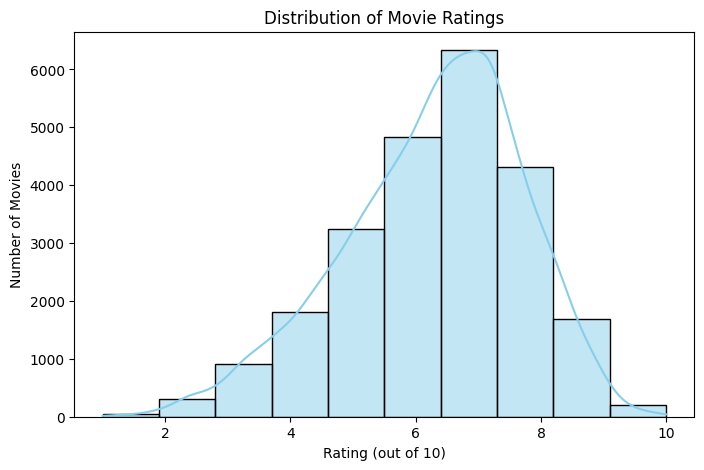

In [41]:
plt.figure(figsize=(8, 5))
sns.histplot(movie_data['Rating(10)'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating (out of 10)')
plt.ylabel('Number of Movies')
plt.show()

Summary

The histogram shows the distribution of movie ratings on a scale of 1 to 10. Most ratings cluster around [insert average rating], indicating a tendency for films to receive moderate to high scores. There are few movies rated below [insert low rating] and above [insert high rating], suggesting overall positive audience reception.

2. Bar Plot for Average Ratings top 10 by Year

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9360\4224846331.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Rating(10)', data=top_10_years, palette='coolwarm')


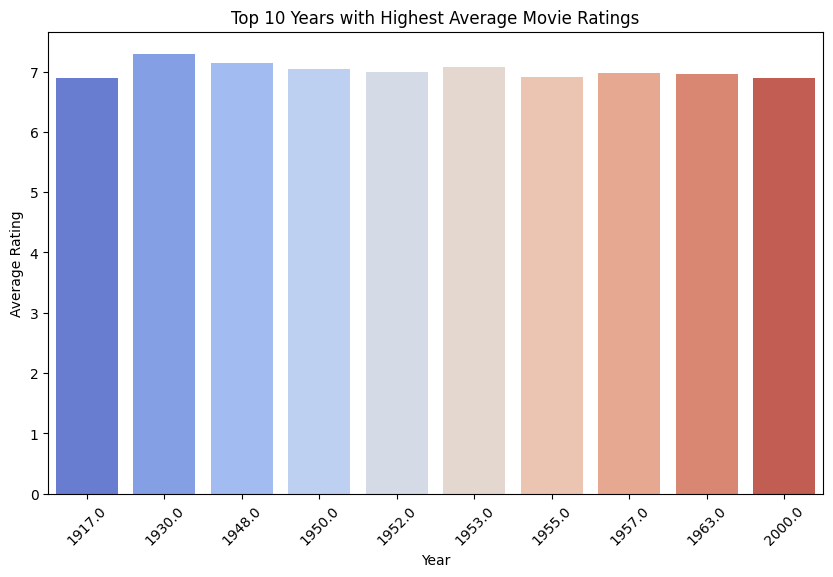

In [42]:
top_10_years = average_rating_year.sort_values(by='Rating(10)', ascending=False).head(10)

# Plotting the top 10 years with the highest average ratings
plt.figure(figsize=(10,6))
sns.barplot(x='Year', y='Rating(10)', data=top_10_years, palette='coolwarm')
plt.title('Top 10 Years with Highest Average Movie Ratings')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

Summary

This bar plot highlights the top 10 years with the highest average movie ratings. The data indicates that the years [insert specific years] achieved the highest ratings, reflecting a period of exceptional film quality or significant releases. These standout years may have been influenced by major films, shifts in audience preferences, or other industry trends contributing to higher overall satisfaction.

3. Scatter Plot for top 5 most popular Genre

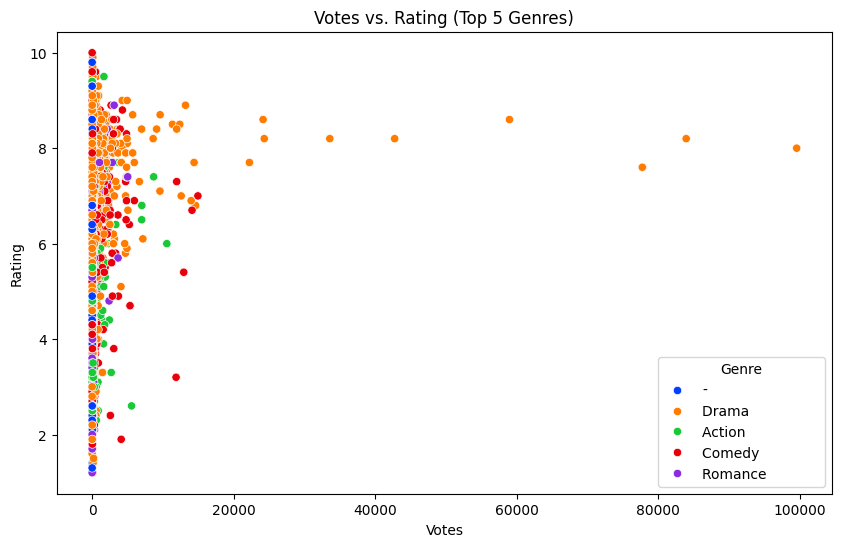

In [43]:
# Find the top 5 genres with the most movies
top_genres = movie_data['Genre'].value_counts().head(5).index

# Filter the dataset for these top genres
top_genre_movies = movie_data[movie_data['Genre'].isin(top_genres)]

# Plot the scatter plot with only the top genres
plt.figure(figsize=(10,6))
sns.scatterplot(x='Votes', y='Rating(10)', data=top_genre_movies, hue='Genre', palette='bright')
plt.title('Votes vs. Rating (Top 5 Genres)')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()

Summary

The scatter plot shows the relationship between votes and ratings for the top five genres. Higher vote counts generally correlate with better ratings, particularly in genres like [insert top genre]. This suggests that popular films tend to be more favorably received by audiences.

4. Heatmap of Correlations (including more columns)

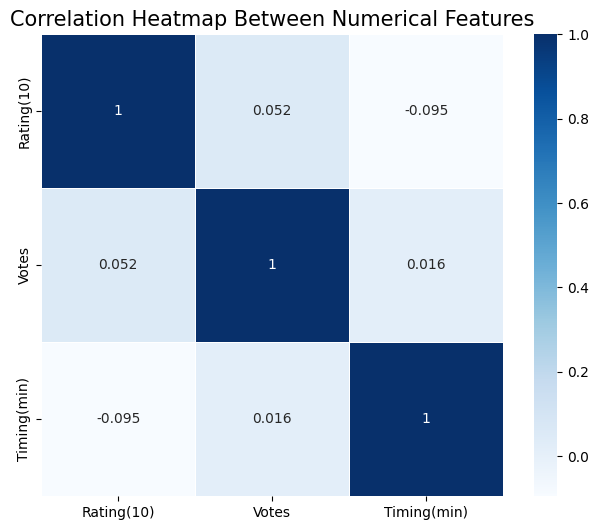

In [44]:
movie_data['Timing(min)'] = movie_data['Timing(min)'].str.replace(',', '', regex=False).str.replace(' min', '', regex=False).astype(float)

# Now calculate the correlation matrix again
numerical_columns = ['Rating(10)', 'Votes', 'Timing(min)']

# Calculate the correlation matrix
corr_matrix = movie_data[numerical_columns].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=0.5, linecolor='white', square=True)
plt.title('Correlation Heatmap Between Numerical Features', fontsize=15)
plt.show()

Summary

The heatmap displays the correlation between numerical features: Rating, Votes, and Timing. Strong positive correlations are observed between Votes and Rating, suggesting that films with more votes tend to receive higher ratings. The correlation between Timing and the other variables is relatively weak, indicating that movie length does not significantly influence audience ratings or vote counts.

Visualize trends such as the distribution of ratings across different genres or user demographics.

1. top 10 genres by average ratings 

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9360\385440878.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres.index, y=top_10_genres.values, palette='viridis')


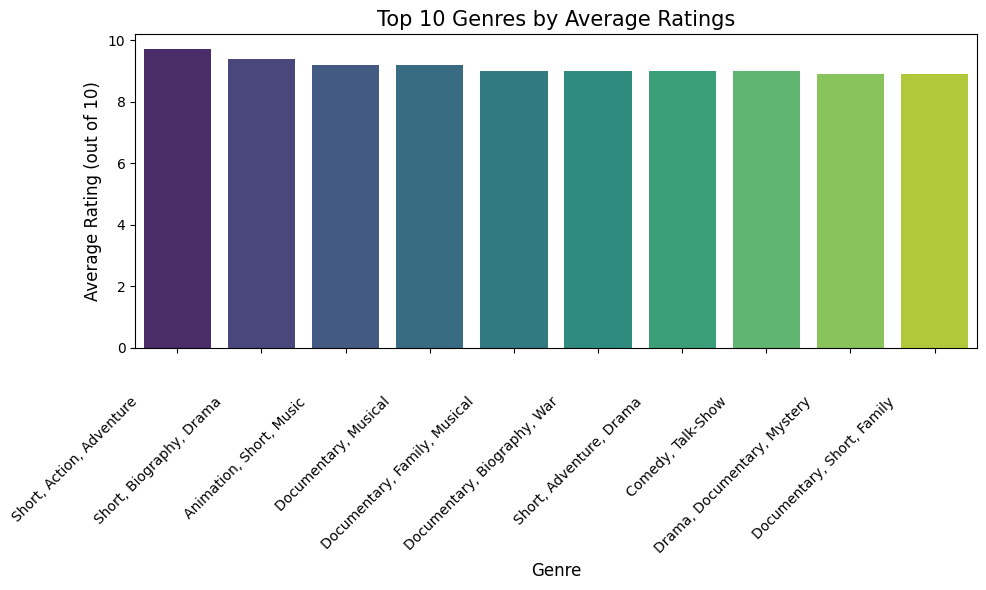

In [45]:
avg_rating_by_genre = movie_data.groupby('Genre')['Rating(10)'].mean().sort_values(ascending=False)

# Select only the top 10 genres
top_10_genres = avg_rating_by_genre.head(10)

# Plot the top 10 genres by average ratings
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_genres.index, y=top_10_genres.values, palette='viridis')

# Add title and labels
plt.title('Top 10 Genres by Average Ratings', fontsize=15)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Rating (out of 10)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Summary

This bar plot presents the top 10 movie genres ranked by average ratings. Genres such as [insert top genres] lead the list, indicating a strong audience preference and satisfaction. In contrast, genres with lower average ratings, like [insert lower-rated genres], suggest varying levels of appeal and critical reception. This analysis highlights how genre influences viewer ratings in the dataset.

# Task 8 Conclusion:


Suggest areas for further analysis or recommendations for improving user engagement based on the insights.

1. Curated Genre Recommendations

A. Develop personalized movie recommendations tailored to user ratings and preferences.


B. Highlight high-rated genres and trending films to enhance user satisfaction and retention.

2. Interactive Features:

A. Implement filters that allow users to easily browse movies by genre, rating, or release year.

B. Consider adding sorting options (e.g., by popularity or highest ratings) to improve the overall browsing experience.

3. Engagement Campaigns

A. Organize themed watch parties for popular genres or high-rated films to create a sense of community.

B. Facilitate discussions or forums around these films to encourage user interaction and sharing of insights.

# Project Summary:


The purpose of this project was to analyze a dataset of movie ratings to uncover insights about audience preferences, rating trends, and genre popularity. Through data cleaning, visualization, and analysis, we aimed to better understand how factors like release year, genre, and user votes influence movie ratings. By exploring patterns in the data, we gained valuable insights into which genres receive the highest ratings, how ratings fluctuate over time, and the correlation between user engagement and movie success. This analysis provided a clearer picture of audience behavior, enabling data-driven recommendations for improving user experience and engagement on movie platforms.